# Исследование надежности заемщиков.


<h2><strong>Описание проекта</strong></h2>
<div class="paragraph">Заказчик — кредитный отдел банка. Нужно разобраться, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок. Входные данные от банка — статистика о платёжеспособности клиентов.</div>
<div class="paragraph">Результаты исследования будут учтены при построении модели&nbsp;<em>кредитного скоринга</em>&nbsp;— специальной системы, которая оценивает способность потенциального заёмщика вернуть кредит банку.</div>

<h2><strong>Описание данных</strong></h2>
<ul><li><code class="code-inline code-inline_theme_light">children</code> —&nbsp;количество детей в семье</li><li><code class="code-inline code-inline_theme_light">days_employed</code>&nbsp;— общий трудовой стаж в днях</li><li><code class="code-inline code-inline_theme_light">dob_years</code>&nbsp;— возраст клиента в годах</li><li><code class="code-inline code-inline_theme_light">education</code>&nbsp;— уровень образования клиента</li><li><code class="code-inline code-inline_theme_light">education_id</code>&nbsp;— идентификатор уровня образования</li><li><code class="code-inline code-inline_theme_light">family_status</code>&nbsp;— семейное положение</li><li><code class="code-inline code-inline_theme_light">family_status_id</code>&nbsp;— идентификатор семейного положения</li><li><code class="code-inline code-inline_theme_light">gender</code>&nbsp;— пол клиента</li><li><code class="code-inline code-inline_theme_light">income_type</code>&nbsp;— тип занятости</li><li><code class="code-inline code-inline_theme_light">debt</code>&nbsp;— имел ли задолженность по возврату кредитов</li><li><code class="code-inline code-inline_theme_light">total_income</code>&nbsp;— ежемесячный доход</li><li><code class="code-inline code-inline_theme_light">purpose</code>&nbsp;— цель получения кредита</li></ul>

### Шаг 1. Обзор данных

Импортируем данные, просматриваем первые 10 строк и общую информацию о датафрейме

In [1]:
import pandas as pd
try:
    df = pd.read_csv('/datasets/data.csv')
except:
    df = pd.read_csv('datasets\yandex_02_data_preparing.csv')
    
display(df.head(10))
df.info()

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


### Шаг 2.1 Заполнение пропусков

В столбцах days_employed и total_income число non-null записей 19351, что меньше числа строк в датафрейме 21525. Это говорит о наличии пропусков в данных столбцах.

Считаем число пропусков по столбцам

In [2]:
df.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Видны пропуски в столбцах days_employed и total_income.

Считаем долю пропусков

In [3]:
df.isna().sum()/df.shape[0]*100

children             0.000000
days_employed       10.099884
dob_years            0.000000
education            0.000000
education_id         0.000000
family_status        0.000000
family_status_id     0.000000
gender               0.000000
income_type          0.000000
debt                 0.000000
total_income        10.099884
purpose              0.000000
dtype: float64

Доля пропусков в столбцах days_employed и total_income одинакова и равна 10,1%

Примечательно идеально одинаковое число пропусков в двух столбцах. Проверим гипотезу, что пропуски появляются всегда одновременно. Для этого отфильтруем df и оставим только строки с пропусками в столбце days_employed и посчитаем сколько пропусков в total_income

In [4]:
df[df['days_employed'].isna()].isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

Число пропусков снова 2174.
Гипотеза подтвердилась. пропуски появляются всегда парами в столбцах days_employed и total_income

Посчитаем характеристики для количественных  столбцов children, dob_years, debt

In [5]:
print('характеристики количественных столбцов для строк с пропусками')
display(df[df['days_employed'].isna()].agg({'children': ['min', 'mean', 'median', 'max'], 'dob_years': ['min', 'mean', 'median', 'max'], 'debt': ['min', 'mean', 'median', 'max']}))
na_rows_count = df['days_employed'].isna().sum()

print('характеристики количественных столбцов  для строк без пропусков')
display(df[df['days_employed'].notna()].agg({'children': ['min', 'mean', 'median', 'max'], 'dob_years': ['min', 'mean', 'median', 'max'], 'debt': ['min', 'mean', 'median', 'max']}))
notna_rows_count = df['days_employed'].notna().sum()

характеристики количественных столбцов для строк с пропусками


,children,dob_years,debt
min,-1.000000,0.000000,0.000000
mean,0.552438,43.632015,0.078197
median,0.000000,43.000000,0.000000
max,20.000000,73.000000,1.000000


характеристики количественных столбцов  для строк без пропусков


,children,dob_years,debt
min,-1.000000,0.000000,0.000000
mean,0.537388,43.255336,0.081184
median,0.000000,42.000000,0.000000
max,20.000000,75.000000,1.000000


Разницы между строк с пропусками и без не видно.
Но заметны артефакты: <a id='artef'></a>
 - бывает число детей  children < 0
 - бывает возраст клиента в годах  dob_years = 0
 - бывает общий трудовой стаж в днях days_employed < 0



Попробуем проанализировать столбцы с категориальными данными.
Посчитаем доли значений в столбце education для группы с пропусками и для группы строк без пропусков:

In [6]:
display(df[df['days_employed'].isna()]['education'].value_counts().head(15)/na_rows_count*100)
display(df[df['days_employed'].notna()]['education'].value_counts().head(15)/notna_rows_count*100)

среднее                64.765409
высшее                 22.815087
СРЕДНЕЕ                 3.081877
Среднее                 2.989880
неоконченное высшее     2.529899
Высшее                  1.149954
ВЫСШЕЕ                  1.057958
начальное               0.873965
Неоконченное высшее     0.321987
НЕОКОНЧЕННОЕ ВЫСШЕЕ     0.321987
Начальное               0.045998
НАЧАЛЬНОЕ               0.045998
Name: education, dtype: float64

среднее                63.779650
высшее                 21.817994
СРЕДНЕЕ                 3.643223
Среднее                 3.338329
неоконченное высшее     3.167795
ВЫСШЕЕ                  1.297091
Высшее                  1.255749
начальное               1.193737
Неоконченное высшее     0.206708
НЕОКОНЧЕННОЕ ВЫСШЕЕ     0.113689
НАЧАЛЬНОЕ               0.082683
Начальное               0.072348
ученая степень          0.020671
Ученая степень          0.005168
УЧЕНАЯ СТЕПЕНЬ          0.005168
Name: education, dtype: float64

Разницы между строк с пропусками и без не видно

Посчитаем доли значений в столбце family_status для группы с пропусками и для группы строк без пропусков:

In [7]:
display(df[df['days_employed'].isna()]['family_status'].value_counts()/na_rows_count*100)
display(df[df['days_employed'].notna()]['family_status'].value_counts()/notna_rows_count*100)

женат / замужем          56.899724
гражданский брак         20.331187
Не женат / не замужем    13.247470
в разводе                 5.151794
вдовец / вдова            4.369825
Name: family_status, dtype: float64

женат / замужем          57.583587
гражданский брак         19.301328
Не женат / не замужем    13.048421
в разводе                 5.596610
вдовец / вдова            4.470053
Name: family_status, dtype: float64

Разницы между строк с пропусками и без не видно

Посчитаем доли значений в столбце gender для группы с пропусками и для группы строк без пропусков:

In [8]:
display(df[df['days_employed'].isna()]['gender'].value_counts().head(15)/na_rows_count*100)
display(df[df['days_employed'].notna()]['gender'].value_counts().head(15)/notna_rows_count*100)

F    68.26127
M    31.73873
Name: gender, dtype: float64

F      65.898403
M      34.096429
XNA     0.005168
Name: gender, dtype: float64

Разницы между строк с пропусками и без не видно, но видим пол XNA. Запомним его

Посчитаем доли значений в столбце income_type для группы с пропусками и для группы строк без пропусков:

In [9]:
display(df[df['days_employed'].isna()]['income_type'].value_counts().head(15)/na_rows_count*100)
display(df[df['days_employed'].notna()]['income_type'].value_counts().head(15)/notna_rows_count*100)

сотрудник          50.827967
компаньон          23.367065
пенсионер          18.997240
госслужащий         6.761730
предприниматель     0.045998
Name: income_type, dtype: float64

сотрудник          51.749264
компаньон          23.652524
пенсионер          17.792362
госслужащий         6.780011
безработный         0.010335
студент             0.005168
предприниматель     0.005168
в декрете           0.005168
Name: income_type, dtype: float64

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Комментарий ревьюера  ✔️</b>
    
Можно еще нормировку использовать:</div>

In [10]:
# КОД РЕВЬЮЕРА

display(df[df['days_employed'].isna()]['income_type'].value_counts(normalize=True))
display(df[df['days_employed'].notna()]['income_type'].value_counts(normalize=True))

сотрудник          0.508280
компаньон          0.233671
пенсионер          0.189972
госслужащий        0.067617
предприниматель    0.000460
Name: income_type, dtype: float64

сотрудник          0.517493
компаньон          0.236525
пенсионер          0.177924
госслужащий        0.067800
безработный        0.000103
студент            0.000052
предприниматель    0.000052
в декрете          0.000052
Name: income_type, dtype: float64

Разницы между строк с пропусками и без не видно

Посчитаем доли значений в столбце purpose для группы с пропусками и для группы строк без пропусков:

In [11]:
display(df[df['days_employed'].isna()]['purpose'].value_counts().head(15)/na_rows_count*100)
display(df[df['days_employed'].notna()]['purpose'].value_counts().head(15)/notna_rows_count*100)

на проведение свадьбы                     4.231831
сыграть свадьбу                           3.725851
свадьба                                   3.495860
строительство собственной недвижимости    3.449862
операции с жильем                         3.403864
покупка недвижимости                      3.311868
покупка жилья для семьи                   3.265869
операции со своей недвижимостью           3.265869
операции с коммерческой недвижимостью     3.219871
ремонт жилью                              3.219871
покупка коммерческой недвижимости         3.081877
покупка жилья для сдачи                   2.989880
недвижимость                              2.851886
операции с недвижимостью                  2.805888
покупка жилой недвижимости                2.805888
Name: purpose, dtype: float64

свадьба                                  3.725906
сыграть свадьбу                          3.581210
на проведение свадьбы                    3.539869
операции с недвижимостью                 3.178130
покупка коммерческой недвижимости        3.085112
покупка жилья                            3.074776
покупка жилья для сдачи                  3.038603
жилье                                    3.033435
операции с коммерческой недвижимостью    3.002429
строительство жилой недвижимости         2.997261
операции с жильем                        2.992093
покупка своего жилья                     2.966255
недвижимость                             2.955920
покупка жилья для семьи                  2.945584
строительство недвижимости               2.899075
Name: purpose, dtype: float64

В итоге, разницы не видно между строками с пропусками и без. Наличие пропусков в количественных столбцах выгледит как полностью случайное. Возможно сбой при записи информации.
Учитывая, что это количественные значения, заполнение пропусков медианными значениями по столбцам не должно существенно повлиять на данные, т.к. медиана бявляется характерной величиной для данных в этом столбце.

Делаем замену на медианные значения:

In [12]:
df['days_employed']=df['days_employed'].fillna(df['days_employed'].median())
#df['total_income']=df['total_income'].fillna(df['total_income'].median())

# Внес исправление. Заменяем медианой по группам, разбитым по полу и по типу образования
df['total_income'] = df['total_income'].fillna(df.groupby(['education', 'gender'])['total_income'].transform('median'))

Проверяем, что все успешно сработало

In [13]:
df.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

### Шаг 2.2 Проверка данных на аномалии и исправления.

При ознакомлении с данными уже были обнаружены [артефакты](#artef)
 - бывает число детей  children < 0
 - бывает возраст клиента в годах  dob_years = 0
 - бывает общий трудовой стаж в днях days_employed < 0
 
 Исследуем эти столбцы более внимательно.
 Число детей от -1 до 20. Значения целочисленные, поэтому можно посмотреть вообще какие есть значения в столбце.

In [14]:
total_rows_count = df.shape[0] # сделаю в переменной значение. Может пригодится еще для расчета долей
sorted(df['children'].unique())

[-1, 0, 1, 2, 3, 4, 5, 20]

Подозрительными являются 20 детей и -1 ребенок. Вероятно это следствие опечатки при заполнии формы. На самом деле вероятно должны быть заполнены 2 и 1 ребенок соответственно

Сделаем замены и убедимся что они сработали успешно

In [15]:
# замена
df['children'] = df['children'].replace(-1,1).replace(20,2)

# проверка
sorted(df['children'].unique())

[0, 1, 2, 3, 4, 5]

Посмотрим теперь на значения в столбце возраста клиента в годах.
Значения целочисленные, поэтому можно посмотреть вообще какие есть значения в столбце.

In [16]:
print(sorted(df['dob_years'].unique()))

[0, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75]


Подозрения на значение 0 в возрасте. Возможно это пропуск, сбой в записи данных либо опечатка, например, вместо 50 написали только вторую цифру 0.

Посмотрим число таких записей

In [17]:
df['dob_years'][df['dob_years']==0].count()

101

Построим гистограмму возрастов

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='dob_years', ylabel='Density'>

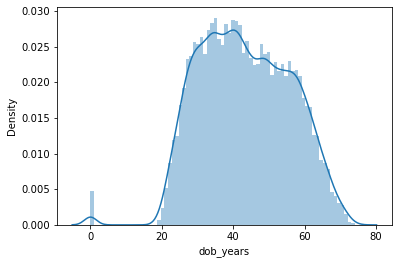

In [18]:
import seaborn as sns
sns.distplot(df['dob_years'], bins=76)

Записей с нулевым возрастом всего 101 шт из 21525. Разумным решением было бы заменить нули на медианный возраст. Его мы определим по группе записей, не включающей нулевые возраста

In [19]:
age_median = df['dob_years'][df['dob_years'] != 0].median()
print(age_median)

43.0


Заменим и проверим результат

In [20]:
#замена
df['dob_years'] = df['dob_years'].replace(0,age_median)

#проверим сколько записей имеют нулевой возраст dob_years
print(df['dob_years'][df['dob_years']==0].count())

0


<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>
    Была б моя воля, я б вообще не заменял бы пропуски. Оставл бы их пропусками, т.к. такие замены это искажение выборки, которое может повлиять на выводы. Но тут учебное задание, нужно было показать что владеем техникой замены. Вот и показываю )))
    В так да, могут получиться и 40летние студенты (впрочем такое бывает иногда) и нулевой стаж при 43 годах (тоже бывает иногда)
    можно было бы
    df['dob_years'] = df['dob_years'].fillna(df.groupby(['income_type'])['dob_years'].transform('median'))
</div>

Теперь посмотрим на столбец days_employed. Из описания данных, такой столбец должен содержать общий трудовой стаж в днях.
В нем встречаются отрицательные значения, кроме того, значения дробные
Посмотрим какие бывают трудовые стажи в годах (целые)

In [21]:
years_employed = df['days_employed']/365
years_employed.rename('years_employed')
years_employed = years_employed.astype('int')
print(sorted(years_employed.unique()))

[-50, -48, -45, -44, -43, -42, -41, -40, -39, -38, -37, -36, -35, -34, -33, -32, -31, -30, -29, -28, -27, -26, -25, -24, -23, -22, -21, -20, -19, -18, -17, -16, -15, -14, -13, -12, -11, -10, -9, -8, -7, -6, -5, -4, -3, -2, -1, 0, 900, 901, 902, 903, 904, 905, 906, 907, 908, 909, 910, 911, 912, 913, 914, 915, 916, 917, 918, 919, 920, 921, 922, 923, 924, 925, 926, 927, 928, 929, 930, 931, 932, 933, 934, 935, 936, 937, 938, 939, 940, 941, 942, 943, 944, 945, 946, 947, 948, 949, 950, 951, 952, 953, 954, 955, 956, 957, 958, 959, 960, 961, 962, 963, 964, 965, 966, 967, 968, 969, 970, 971, 972, 973, 974, 975, 976, 977, 978, 979, 980, 981, 982, 983, 984, 985, 986, 987, 988, 989, 990, 991, 992, 993, 994, 995, 996, 997, 998, 999, 1000, 1001, 1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012, 1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023, 1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034, 1035, 1036, 1037, 1038, 1039, 1040, 1041, 1042, 1043, 1044, 

Ситуация похожа на то, что стаж имеет две ошибки
 - он отрицателен для корректных значений
 - в случае положительного стажа он бывает от 900 до 1100 лет.

Проверим первую гипотезу. Не должно быть случаев, когда стаж превышает возраст

In [22]:
df[-df['days_employed']/365 > df['dob_years']].shape[0]


0

Посмотрим на распределение стажа отрицательного

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='years_employed', ylabel='Density'>

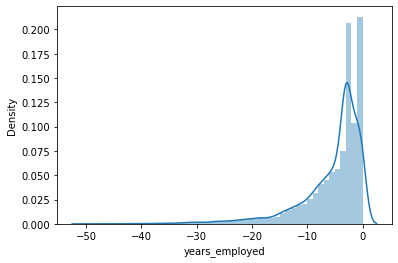

In [23]:
#добавим колонку years_employed
df['years_employed'] = df['days_employed'] / 365.25
df['years_employed'] = df['years_employed'].astype('int')

sns.distplot(df['years_employed'][df['years_employed'] <= 0] )

С учетом гипотезы, что у стажа просто перепутан знак, для отрицательных значений все корректно. Число людей с большим стажем невелико, а больше с небольшим стажем.

Гипотеза подтвердилась, у стажа нужно заменить знак.

Посчитаем сколько аномалий второго типа (стаж от 900 до 1100 лет) из 21525 записей

In [24]:
print(df['years_employed'][df['years_employed'] > 0].count())


3445


Около 15% получается. 

Посмотрим, как распределены по значениям положительные стажи

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='years_employed', ylabel='Density'>

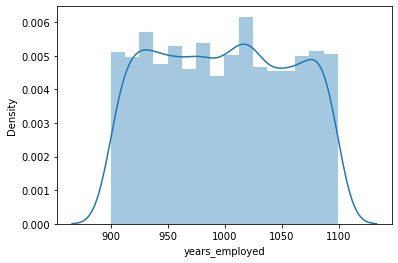

In [25]:

sns.distplot(df[df['years_employed'] > 0]['years_employed'] )

Распределение близко к равномерному.


Посмотрим на распределение возрастов людей для групп стажа отрицательного (нормальный) и аномально положительного

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='dob_years', ylabel='Density'>

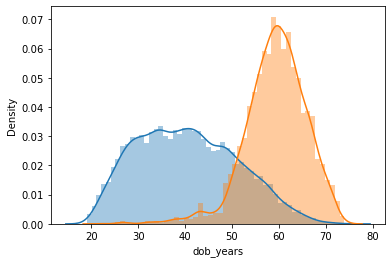

In [26]:
sns.distplot(df[df['years_employed'] <= 0]['dob_years'] , bins=55)

sns.distplot(df[df['years_employed'] > 0]['dob_years'] , bins=50)

Видно, что аномальные положительные это в основном возрастные люди, у которых можно ожидать большой стаж. Т.е. аномалии не случайны, есть корреляция с возрастом.

Меня смущает распределение этих положительных стажей. Оно равномерное (от 900 до 1100 лет). Даже если это какая-то группа пенсионеров, то распределение стажей должно быть близко к нормальному, как и возрасты, а тут далеко не гаусс. Поэтому, считаю, что линейными преобразованиями (сдвиг + масштаб) не решить проблему положительных аномалий. 

Возможно при вводе даты была допущена опечатка. С учетом, что число годов в диапазоне круглое (от 900 до 1100), вероятно ошибка связана либо с ошибкой ввода года. Также возможно данные хранились в нестандартном формате и при слиянии таблиц смешались разнородные данные в разных форматах

Возможно это время в часах. Тогда 900..1100 лет разделить нужно на 24 и стаж превратится в 38..45 лет. Адекватный стаж для пожилых людей. Это неплохая гипотеза. проверим ее.


Посмотрим как изменится гистограмма<br/>
Заодно посчитаем среднее  медиану и проверим как изменятся эти статистики

Сначала до замены:

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-5.586780973451328
-3.0


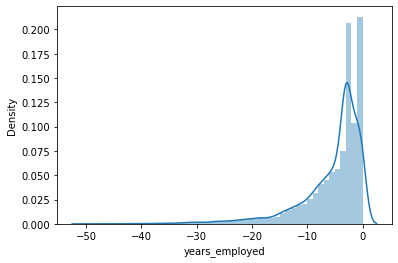

In [27]:
sns.distplot(df['years_employed'][df['years_employed'] <= 0])
print(df['years_employed'][df['years_employed'] <= 0].mean())
print(df['years_employed'][df['years_employed'] <= 0].median())

Заменим положительные значения на отрицательные, переведенные в сутки.<br>
и посчитаем среднее  медиану

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


-11.353372048006188
-4.0


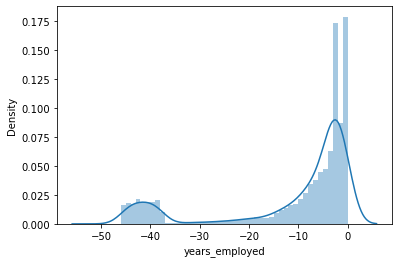

In [28]:
df.loc[df['years_employed'] >0, 'years_employed'] = -df['years_employed']/24
sns.distplot(df['years_employed'])
print(df['years_employed'].mean())
print(df['years_employed'].median())

Видно, что аномальные положительные значения стажа после преобразования оказались в хвосте распределения. Учитывая, что таких значений много, около 15%, они существенно повлияли на средний стаж и даже на медианный стаж.
Получается в рамках гипотезы про то, что аномальные положительные значения стажа это время в часах, замена аномалий существенно меняет статистики данных. Кроме того, не видно снижение распределения к хвосту (равномерное распределение), что также играет против гипотезы.

Гипотеза не верна

Вероятно проблема с форматом дат и считыванием либо проблема в каких-то опечатках, которые могли допустить возрастные люди.
Тогда сделаем консервативную замену на медианное значение стажа. Считаем что это ошибки в данных, технический сбой.

В данном случае нужно спросить у поставщиков данных почему возникла такая аномалия. Но для анализа может быть достаточно заменить их на медианный стаж. Посчитаем его

In [29]:
median_days_employed = df['days_employed'][df['days_employed'] <= 0].median()
median_days_employed/365

-3.692895310029178

В целом, такой стаж не должен привести к ошибкам  вида "стаж превышает возраст". Стаж в 3,5 года выглядит разумным

Делаем замены:

In [30]:
df.loc[df['days_employed']>0,'days_employed'] = median_days_employed
#df.loc[df['days_employed']>0,'days_employed'] = -df['days_employed']/24 гипотеза про то, что положительные значения - время в часах
df['days_employed'] = -df['days_employed']


Строим гистограмму, смотрим как выглядит она после замены

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='years_employed', ylabel='Density'>

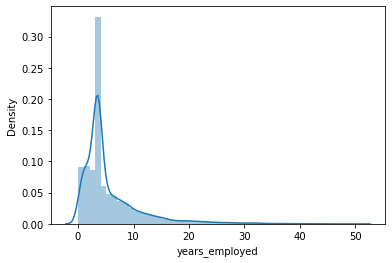

In [31]:
df['years_employed'] = df['days_employed'] / 365
sns.distplot(df['years_employed'])

В графике гистограммы виден пик. Его мы создали заменой на медианное значение. сначала мы пропуски меняли на медиану, а потом аномалии положительные тоже на медиану.
Мне не нравится такая замена, но пока ничего лучшего не просматривается.



### Шаг 2.3. Изменение типов данных.

Заменим вещественный тип данных в столбце total_income на целочисленный и проверим результат

In [32]:
#приведение типа
df['total_income'] = df['total_income'].astype('int')

#смотрим
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     21525 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      21525 non-null  int32  
 11  purpose           21525 non-null  object 
 12  years_employed    21525 non-null  float64
dtypes: float64(2), int32(1), int64(5), object(5)
memory usage: 2.1+ MB


Все прошло успешно. Тип данных в столбце total_income теперь int

### Шаг 2.4. Удаление дубликатов.

На этапе исследования данных в датасете были замечены неявные дубликаты в столбце education (значения отличаются только регистром), а также в столбце purpose, где одна и та же цель написана разными способами ('на проведение свадьбы', 'сыграть свадьбу', 'свадьба')

Вероятно, неявные дубликаты в education образовались при объединении таблицы из разных источников, где они хранились в разных регистрах (где-то в нижнем, где-то в верхнем).
вероятно, неявные дубликаты в purpose образовались по причине того, что заявители сами писали причину, поэтому возникло много вариантов написания одной и той же причины.

Удалять дубликаты будем в 3 шага: 
 - изучим
 - исправим неявные дубликаты
 - удалим явные дубликаты

In [33]:
print(sorted(df['education'].unique()))

['ВЫСШЕЕ', 'Высшее', 'НАЧАЛЬНОЕ', 'НЕОКОНЧЕННОЕ ВЫСШЕЕ', 'Начальное', 'Неоконченное высшее', 'СРЕДНЕЕ', 'Среднее', 'УЧЕНАЯ СТЕПЕНЬ', 'Ученая степень', 'высшее', 'начальное', 'неоконченное высшее', 'среднее', 'ученая степень']


приведем к нижнему регистру и проверим

In [34]:
df['education'] = df['education'].str.lower()

# проверяем
print(sorted(df['education'].unique()))

['высшее', 'начальное', 'неоконченное высшее', 'среднее', 'ученая степень']


Успешно.

Теперь столбец purpose

In [35]:
print(sorted(df['purpose'].unique()))

['автомобили', 'автомобиль', 'высшее образование', 'дополнительное образование', 'жилье', 'заняться высшим образованием', 'заняться образованием', 'на покупку автомобиля', 'на покупку подержанного автомобиля', 'на покупку своего автомобиля', 'на проведение свадьбы', 'недвижимость', 'образование', 'операции с жильем', 'операции с коммерческой недвижимостью', 'операции с недвижимостью', 'операции со своей недвижимостью', 'покупка жилой недвижимости', 'покупка жилья', 'покупка жилья для сдачи', 'покупка жилья для семьи', 'покупка коммерческой недвижимости', 'покупка недвижимости', 'покупка своего жилья', 'получение высшего образования', 'получение дополнительного образования', 'получение образования', 'приобретение автомобиля', 'профильное образование', 'ремонт жилью', 'свадьба', 'свой автомобиль', 'сделка с автомобилем', 'сделка с подержанным автомобилем', 'строительство жилой недвижимости', 'строительство недвижимости', 'строительство собственной недвижимости', 'сыграть свадьбу']


Напишем функцию замены и применим ее через apply()

In [36]:
def standart_purpose(str):
    if 'свадьб' in str:
        return 'свадьба'
    elif 'авто' in str:
        return 'автомобиль'
    elif 'недвиж' in str:
        return 'недвижимость'
    elif 'жиль' in str:
        return 'недвижимость'
    elif 'образова' in str:
        return 'образование'
    else:
        return str

lst = list(df['purpose'].unique())
for s in lst:
    print(s + ' => ' + standart_purpose(s))

покупка жилья => недвижимость
приобретение автомобиля => автомобиль
дополнительное образование => образование
сыграть свадьбу => свадьба
операции с жильем => недвижимость
образование => образование
на проведение свадьбы => свадьба
покупка жилья для семьи => недвижимость
покупка недвижимости => недвижимость
покупка коммерческой недвижимости => недвижимость
покупка жилой недвижимости => недвижимость
строительство собственной недвижимости => недвижимость
недвижимость => недвижимость
строительство недвижимости => недвижимость
на покупку подержанного автомобиля => автомобиль
на покупку своего автомобиля => автомобиль
операции с коммерческой недвижимостью => недвижимость
строительство жилой недвижимости => недвижимость
жилье => недвижимость
операции со своей недвижимостью => недвижимость
автомобили => автомобиль
заняться образованием => образование
сделка с подержанным автомобилем => автомобиль
получение образования => образование
автомобиль => автомобиль
свадьба => свадьба
получение дополни

Все хорошо. Делаем замены и проверяем результат

In [37]:
df['purpose'] = df['purpose'].apply(standart_purpose)

# проверяем
print(sorted(df['purpose'].unique()))

['автомобиль', 'недвижимость', 'образование', 'свадьба']


Успешно.

Теперь удалим дубликаты. При удалении мы удалим сразу все, и те что исходно были явными и те, что исходно были неявными

После удаления посчитаем число строк дубликатов

In [38]:
df.duplicated().sum()

344

проверим общую информацию в датафрейме (внимание на число строк)

In [39]:
df = df.drop_duplicates().reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21181 entries, 0 to 21180
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21181 non-null  int64  
 1   days_employed     21181 non-null  float64
 2   dob_years         21181 non-null  int64  
 3   education         21181 non-null  object 
 4   education_id      21181 non-null  int64  
 5   family_status     21181 non-null  object 
 6   family_status_id  21181 non-null  int64  
 7   gender            21181 non-null  object 
 8   income_type       21181 non-null  object 
 9   debt              21181 non-null  int64  
 10  total_income      21181 non-null  int32  
 11  purpose           21181 non-null  object 
 12  years_employed    21181 non-null  float64
dtypes: float64(2), int32(1), int64(5), object(5)
memory usage: 2.0+ MB


Успешно

### Шаг 2.5. Формирование дополнительных датафреймов словарей, декомпозиция исходного датафрейма.

Создаем словарь dic_education и проверяем

In [40]:
dic_education = df.loc[:,'education':'education_id'].drop_duplicates().reset_index(drop=True)
dic_education

,education,education_id
0,высшее,0
1,среднее,1
2,неоконченное высшее,2
3,начальное,3
4,ученая степень,4


Создаем словарь dic_family_status и проверяем

In [41]:
dic_family_status = df.loc[:,'family_status':'family_status_id'].drop_duplicates().reset_index(drop=True)
dic_family_status

,family_status,family_status_id
0,женат / замужем,0
1,гражданский брак,1
2,вдовец / вдова,2
3,в разводе,3
4,Не женат / не замужем,4


Успешно

Удаляем столбцы education и family_status из исходного датафрейма

In [42]:
df.pop('education')
df.pop('family_status')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21181 entries, 0 to 21180
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21181 non-null  int64  
 1   days_employed     21181 non-null  float64
 2   dob_years         21181 non-null  int64  
 3   education_id      21181 non-null  int64  
 4   family_status_id  21181 non-null  int64  
 5   gender            21181 non-null  object 
 6   income_type       21181 non-null  object 
 7   debt              21181 non-null  int64  
 8   total_income      21181 non-null  int32  
 9   purpose           21181 non-null  object 
 10  years_employed    21181 non-null  float64
dtypes: float64(2), int32(1), int64(5), object(3)
memory usage: 1.7+ MB


Успешно

### Шаг 2.6. Категоризация дохода.

Создадим функцию, которая будет возвращать категорию. применим функцию через apply()

создаем и тестируем

In [43]:
def set_category(val):
    try:
        #val = val*1

        if val < 0:
            return 'NEG'
        elif val <= 30000:
            return 'E'
        elif val <= 50000:
            return 'D'
        elif val <= 200000:
            return 'C'
        elif val <= 1000000:
            return 'B'
        else:
            return 'A'
    except:
        return 'not numeric income'

print(str(-1) + ': val = ' + str(-50000) + ': result = ' + set_category(-50000))
print(str(0) + ': val = ' + str(0) + ': result = ' + set_category(0))
for v in range(22)[13:]:
    print(str(v) + ': val = ' + str(2**v) + ': result = ' + set_category(2**v))
print('25000' + ': val = ' + str('25000') + ': result = ' + set_category('25000'))

-1: val = -50000: result = NEG
0: val = 0: result = E
13: val = 8192: result = E
14: val = 16384: result = E
15: val = 32768: result = D
16: val = 65536: result = C
17: val = 131072: result = C
18: val = 262144: result = B
19: val = 524288: result = B
20: val = 1048576: result = A
21: val = 2097152: result = A
25000: val = 25000: result = not numeric income


Применяем и создаем столбец 'total_income_category' и проверяем

In [44]:
df['total_income_category'] = df['total_income'].apply(set_category)
# проверяем
print(sorted(df['total_income_category'].unique()))

df.head(15)


['A', 'B', 'C', 'D', 'E']


,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,total_income_category
0,1,8437.673028,42,0,0,F,сотрудник,0,253875,недвижимость,23.116912,B
1,1,4024.803754,36,1,0,F,сотрудник,0,112080,автомобиль,11.026860,C
2,0,5623.422610,33,1,0,M,сотрудник,0,145885,недвижимость,15.406637,C
3,3,4124.747207,32,1,0,M,сотрудник,0,267628,образование,11.300677,B
4,0,1347.906788,53,1,1,F,пенсионер,0,158616,свадьба,3.692895,C
5,0,926.185831,27,0,1,M,компаньон,0,255763,недвижимость,2.537495,B
6,0,2879.202052,43,0,0,F,компаньон,0,240525,недвижимость,7.888225,B
7,0,152.779569,50,1,0,M,сотрудник,0,135823,образование,0.418574,C
8,2,6929.865299,35,0,1,F,сотрудник,0,95856,свадьба,18.985932,C
9,0,2188.756445,41,1,0,M,сотрудник,0,144425,недвижимость,5.996593,C


Успешно

### Шаг 2.7. Категоризация целей кредита.

Это мы уже почти сделали на этапе 2.4 удаления неявных дубликатов. Там как раз писал UDF и через apply удалял дубликаты

Создадим столбец purpose_category и сформируем записи по стандарту

In [45]:
dict_P = {'автомобиль': 'операции с автомобилем', 'недвижимость':'операции с недвижимостью', 'образование':'получение образования', 'свадьба':'проведение свадьбы'}
df['purpose_category'] = df['purpose'].map(dict_P)

# проверяем
print(sorted(df['purpose_category'].unique()))

df.head(10)

['операции с автомобилем', 'операции с недвижимостью', 'получение образования', 'проведение свадьбы']


,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,total_income_category,purpose_category
0,1,8437.673028,42,0,0,F,сотрудник,0,253875,недвижимость,23.116912,B,операции с недвижимостью
1,1,4024.803754,36,1,0,F,сотрудник,0,112080,автомобиль,11.026860,C,операции с автомобилем
2,0,5623.422610,33,1,0,M,сотрудник,0,145885,недвижимость,15.406637,C,операции с недвижимостью
3,3,4124.747207,32,1,0,M,сотрудник,0,267628,образование,11.300677,B,получение образования
4,0,1347.906788,53,1,1,F,пенсионер,0,158616,свадьба,3.692895,C,проведение свадьбы
5,0,926.185831,27,0,1,M,компаньон,0,255763,недвижимость,2.537495,B,операции с недвижимостью
6,0,2879.202052,43,0,0,F,компаньон,0,240525,недвижимость,7.888225,B,операции с недвижимостью
7,0,152.779569,50,1,0,M,сотрудник,0,135823,образование,0.418574,C,получение образования
8,2,6929.865299,35,0,1,F,сотрудник,0,95856,свадьба,18.985932,C,проведение свадьбы
9,0,2188.756445,41,1,0,M,сотрудник,0,144425,недвижимость,5.996593,C,операции с недвижимостью


### Шаг 2.8. Категоризация возраста.

In [46]:
def set_age_cat(val):
    try:
        val = val*1

        if val < 0:
            return 'NEGATIVE'
        elif val <= 18:
            return '01-18'
        elif val <= 30:
            return '19-30'
        elif val <= 40:
            return '31-40'
        elif val <= 60:
            return '41-60'
        elif val <= 70:
            return '60-70'
        else:
            return '71+'
    except:
        return 'not numeric age'

print(str(-1) + ': val = ' + str(-5) + ': result = ' + set_age_cat(-50000))
for v in range(20):
    print('val = ' + str(5*v) + ': result = ' + set_age_cat(5*v))
print('25' + ': val = ' + str('25') + ': result = ' + set_age_cat('25'))

-1: val = -5: result = NEGATIVE
val = 0: result = 01-18
val = 5: result = 01-18
val = 10: result = 01-18
val = 15: result = 01-18
val = 20: result = 19-30
val = 25: result = 19-30
val = 30: result = 19-30
val = 35: result = 31-40
val = 40: result = 31-40
val = 45: result = 41-60
val = 50: result = 41-60
val = 55: result = 41-60
val = 60: result = 41-60
val = 65: result = 60-70
val = 70: result = 60-70
val = 75: result = 71+
val = 80: result = 71+
val = 85: result = 71+
val = 90: result = 71+
val = 95: result = 71+
25: val = 25: result = not numeric age


Создаем столбец dob_years_category с категорией возраста заемщика

In [47]:
#df['dob_years_category'] = df['dob_years'].apply(set_age_cat)
df['dob_years_category'] = pd.cut(df['dob_years'], [-float('inf'), 0, 18, 30, 40, 60, 70, float('inf')])
# проверяем
print(sorted(df['dob_years_category'].unique()))

df.head(5)

[Interval(18.0, 30.0, closed='right'), Interval(30.0, 40.0, closed='right'), Interval(40.0, 60.0, closed='right'), Interval(60.0, 70.0, closed='right'), Interval(70.0, inf, closed='right')]


,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,total_income_category,purpose_category,dob_years_category
0,1,8437.673028,42,0,0,F,сотрудник,0,253875,недвижимость,23.116912,B,операции с недвижимостью,"(40.0, 60.0]"
1,1,4024.803754,36,1,0,F,сотрудник,0,112080,автомобиль,11.026860,C,операции с автомобилем,"(30.0, 40.0]"
2,0,5623.422610,33,1,0,M,сотрудник,0,145885,недвижимость,15.406637,C,операции с недвижимостью,"(30.0, 40.0]"
3,3,4124.747207,32,1,0,M,сотрудник,0,267628,образование,11.300677,B,получение образования,"(30.0, 40.0]"
4,0,1347.906788,53,1,1,F,пенсионер,0,158616,свадьба,3.692895,C,проведение свадьбы,"(40.0, 60.0]"


### Шаг 2.9. Категоризация трудового стажа.

<b>Комментарий студента:</b>
<br>Это не входило в исходное задание. Сделал дополнительно
</div>
Пишем UDF для категории стажа и проверяем(тестируем) ее работу

In [48]:
def set_years_employed_cat(val):
    try:
        val = val*1

        if val < 0:
            return 'NEGATIVE'
        elif val <= 1:
            return '00-01'
        elif val <= 3:
            return '02-03'
        elif val <= 7:
            return '04-07'
        elif val <= 15:
            return '08-15'
        elif val <= 30:
            return '16-30'
        else:
            return '31+'
    except:
        return 'not numeric age'

print(str(-1) + ': val = ' + str(-5) + ': result = ' + set_years_employed_cat(-50000))
for v in range(35):
    print('val = ' + str(v) + ': result = ' + set_years_employed_cat(v))
print('25' + ': val = ' + str('25') + ': result = ' + set_years_employed_cat('25'))

-1: val = -5: result = NEGATIVE
val = 0: result = 00-01
val = 1: result = 00-01
val = 2: result = 02-03
val = 3: result = 02-03
val = 4: result = 04-07
val = 5: result = 04-07
val = 6: result = 04-07
val = 7: result = 04-07
val = 8: result = 08-15
val = 9: result = 08-15
val = 10: result = 08-15
val = 11: result = 08-15
val = 12: result = 08-15
val = 13: result = 08-15
val = 14: result = 08-15
val = 15: result = 08-15
val = 16: result = 16-30
val = 17: result = 16-30
val = 18: result = 16-30
val = 19: result = 16-30
val = 20: result = 16-30
val = 21: result = 16-30
val = 22: result = 16-30
val = 23: result = 16-30
val = 24: result = 16-30
val = 25: result = 16-30
val = 26: result = 16-30
val = 27: result = 16-30
val = 28: result = 16-30
val = 29: result = 16-30
val = 30: result = 16-30
val = 31: result = 31+
val = 32: result = 31+
val = 33: result = 31+
val = 34: result = 31+
25: val = 25: result = not numeric age


Создаем столбец с категорием стажа years_employed_category и проверяем значения в нем

In [85]:
#df['years_employed_category'] = df['years_employed'].apply(set_years_employed_cat)
#df['years_employed_category'] = pd.cut(df['years_employed'], [-10, 0, 1, 3, 7, 15, 30, 100], precision=0)
df['years_employed_category'] = pd.qcut(df['years_employed'], 6, precision=0)
# проверяем
print(sorted(df['years_employed_category'].unique()))

df.head(5)

[Interval(-0.9, 2.0, closed='right'), Interval(2.0, 3.0, closed='right'), Interval(3.0, 4.0, closed='right'), Interval(4.0, 5.0, closed='right'), Interval(5.0, 9.0, closed='right'), Interval(9.0, 50.0, closed='right')]


,children,days_employed,dob_years,education_id,family_status_id,gender,income_type,debt,total_income,purpose,years_employed,total_income_category,purpose_category,dob_years_category,years_employed_category
0,1,8437.673028,42,0,0,F,сотрудник,0,253875,недвижимость,23.116912,B,операции с недвижимостью,"(40.0, 60.0]","(9.0, 50.0]"
1,1,4024.803754,36,1,0,F,сотрудник,0,112080,автомобиль,11.026860,C,операции с автомобилем,"(30.0, 40.0]","(9.0, 50.0]"
2,0,5623.422610,33,1,0,M,сотрудник,0,145885,недвижимость,15.406637,C,операции с недвижимостью,"(30.0, 40.0]","(9.0, 50.0]"
3,3,4124.747207,32,1,0,M,сотрудник,0,267628,образование,11.300677,B,получение образования,"(30.0, 40.0]","(9.0, 50.0]"
4,0,1347.906788,53,1,1,F,пенсионер,0,158616,свадьба,3.692895,C,проведение свадьбы,"(40.0, 60.0]","(3.0, 4.0]"


### Ответы на вопросы.

##### Вопрос 1:

Строим сводную таблицу и считаем долю должников frac_debt для категорий заемщиков. Заемщиков разделяем на категории по числу детей (поле children)

debt,children,without_debt,has_debt,frac_debt
0,0,12819,1061,7.644092
1,1,4360,445,9.261186
2,2,1916,202,9.537299
3,3,302,27,8.206687
4,4,36,4,10.000000
5,5,9,0,0.000000


<AxesSubplot:xlabel='children', ylabel='frac_debt'>

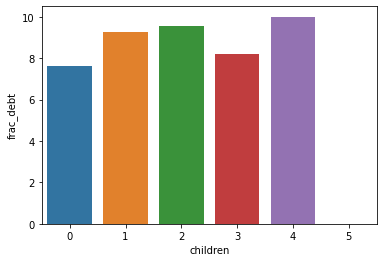

In [50]:
data_pivot = df.pivot_table(index='children', columns='debt', values='total_income_category', aggfunc='count').reset_index()
data_pivot=data_pivot.rename(columns={1:'has_debt', 0:'without_debt'})

data_pivot['has_debt'] = data_pivot['has_debt'].fillna(0)
data_pivot['frac_debt'] = data_pivot['has_debt'] / (data_pivot['has_debt']+data_pivot['without_debt'])*100

data_pivot['has_debt'] = data_pivot['has_debt'].astype('int')
data_pivot['without_debt'] = data_pivot['without_debt'].astype('int')

display(data_pivot)

sns.barplot(x='children', y='frac_debt', data=data_pivot)

Как видим,  число заемщиков с 5ю детьми низкое, поэтому выборка не надежная в этой категории.<br />
А для числа детей от 0 до 4 данных хватает и судя по доле должников (frac_debt), наличие детей не влияет на риск перехода в категорию должников.

##### Вывод 1:

Наличие детей не влияет на риск перехода в категорию должников.

##### Вопрос 2:
Есть ли зависимость между семейным положением и возвратом кредита в срок?

Строим сводную таблицу и считаем долю должников frac_debt для категорий заемщиков. Заемщиков разделяем на категории по числу детей (поле children)

,family_status_id,without_debt,has_debt,frac_debt,family_status
0,0,11185,929,7.668813,женат / замужем
1,1,3749,388,9.378777,гражданский брак
2,2,884,63,6.652587,вдовец / вдова
3,3,1108,85,7.124895,в разводе
4,4,2516,274,9.820789,Не женат / не замужем


<AxesSubplot:xlabel='family_status', ylabel='frac_debt'>

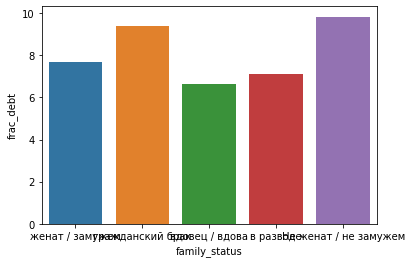

In [51]:
# строим сводную таблицу
data_pivot = df.pivot_table(index='family_status_id', columns='debt', values='purpose', aggfunc='count').reset_index()
# переименуем столбцы в человекопонятные названия
data_pivot=data_pivot.rename(columns={1:'has_debt', 0:'without_debt'})

# заменим пропуски на нули
data_pivot['has_debt'] = data_pivot['has_debt'].fillna(0)

# считаем долю должников
data_pivot['frac_debt'] = data_pivot['has_debt'] / (data_pivot['has_debt']+data_pivot['without_debt'])*100

# число людей целочисленное
data_pivot['has_debt'] = data_pivot['has_debt'].astype('int')
data_pivot['without_debt'] = data_pivot['without_debt'].astype('int')

# используем dic_family_status для вывода понятных категорий семейного положения
data_pivot = data_pivot.merge(dic_family_status, on='family_status_id', how='left')
display(data_pivot)

# строим гистограмму для наглядности
sns.barplot(x='family_status', y='frac_debt', data=data_pivot)

Прослеживается слабая зависимость: те, кто еще не вступали в брак (не женат либо только в гражданском браке) имеют более высокий уровень задолженности (9,4%..9,84%) против тех, кто уже в браке или был в браке (6,68% .. 7,69%)

Это можно объяснить тем, что брак сам по себе является обязательством и на него соглашаются в среднем более ответственные лица, которые более ответстенно относятся и к финансовым обязательствам перед банком.

##### Вывод 2:

Есть зависимость между семейным положением и возвратом кредита в срок. Те, кто еще не вступали в брак (не женат либо только в гражданском браке) имеют более высокий риск задолженности (9,4%..9,84%) против тех, кто уже в браке или был в браке (6,68% .. 7,69%)

In [52]:
# КОД РЕВЬЮЕРА

def my_mean(x): return '{:.2%} '.format(x.mean())

# В кач-ве агрегирования можно любую функцию брать.

df.groupby('children')['debt'].agg(['count', 'sum', my_mean])

,count,sum,my_mean
children,,,
0,13880,1061,7.64%
1,4805,445,9.26%
2,2118,202,9.54%
3,329,27,8.21%
4,40,4,10.00%
5,9,0,0.00%


##### Вопрос 3:
Есть ли зависимость между уровнем дохода и возвратом кредита в срок?

Строим сводную таблицу и считаем долю должников frac_debt для категорий заемщиков. Заемщиков разделяем на категории по доходу (поле total_income_category)

debt,total_income_category,without_debt,has_debt,frac_debt
0,A,23,2,8.000000
1,B,4831,364,7.006737
2,C,14239,1350,8.659953
3,D,329,21,6.000000
4,E,20,2,9.090909


<AxesSubplot:xlabel='total_income_category', ylabel='frac_debt'>

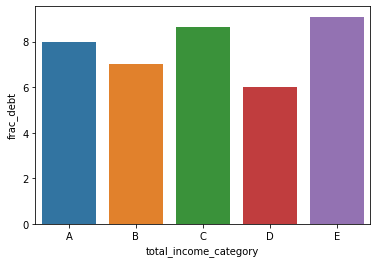

In [53]:
# строим сводную таблицу
data_pivot = df.pivot_table(index='total_income_category', columns='debt', values='purpose', aggfunc='count').reset_index()
# переименуем столбцы в человекопонятные названия
data_pivot=data_pivot.rename(columns={1:'has_debt', 0:'without_debt'})

# считаем долю должников
data_pivot['frac_debt'] = data_pivot['has_debt'] / (data_pivot['has_debt']+data_pivot['without_debt'])*100

# число людей целочисленное
data_pivot['has_debt'] = data_pivot['has_debt'].astype('int')
data_pivot['without_debt'] = data_pivot['without_debt'].astype('int')

display(data_pivot)

# строим гистограмму для наглядности
sns.barplot(x='total_income_category', y='frac_debt', data=data_pivot)

Как видно из графика, зависимости между уровнем дохода и возвратом кредита в срок нет.

##### Вывод 3:

Зависимости между уровнем дохода и возвратом кредита в срок нет.

##### Вопрос 4:
Как разные цели кредита влияют на его возврат в срок?

Строим сводную таблицу и считаем долю должников frac_debt для категорий заемщиков. Заемщиков разделяем на категории по назначению кредита (поле purpose_category)

debt,purpose_category,without_debt,has_debt,frac_debt
0,операции с автомобилем,3875,402,9.399112
1,операции с недвижимостью,9832,781,7.358899
2,получение образования,3603,370,9.312862
3,проведение свадьбы,2132,186,8.024159


<AxesSubplot:xlabel='purpose_category', ylabel='frac_debt'>

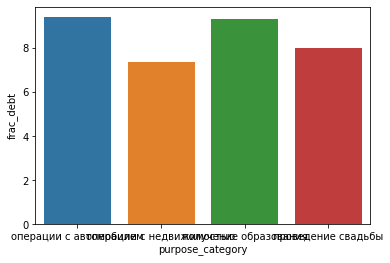

In [54]:
# строим сводную таблицу
data_pivot = df.pivot_table(index='purpose_category', columns='debt', values='purpose', aggfunc='count').reset_index()
# переименуем столбцы в человекопонятные названия
data_pivot=data_pivot.rename(columns={1:'has_debt', 0:'without_debt'})

# считаем долю должников
data_pivot['frac_debt'] = data_pivot['has_debt'] / (data_pivot['has_debt']+data_pivot['without_debt'])*100

# число людей целочисленное
data_pivot['has_debt'] = data_pivot['has_debt'].astype('int')
data_pivot['without_debt'] = data_pivot['without_debt'].astype('int')

display(data_pivot)

# строим гистограмму для наглядности
sns.barplot(x='purpose_category', y='frac_debt', data=data_pivot)

Из таблицы видно, что операции с недвижимостью и кредиты на свадьбу несут заметно меньший риск, чем операции с автомобилями и получение образования.

Вероятно это объясняется тем, что кредиты на недвижимость выдаются с обременением и на такие условия согласны люди, точно уверенные в том, что платить нужно своевременно. Кредиты на свадьбу берут молодые люди, не желающие начинать брак с долгов по кредитам, поэтому платят в срок, либо платят в срок родители молодоженов, как известно, старшее поколение более ответственно.

Кредиты на авто часто выдаются без обеспечения, проверки проще, поэтому клиентская база не столь качественная, отсюда и более высокий уровень задолженности. аналогично можно объяснить и относительно высокий риск задолженности по кредитам на получение образования

##### Вывод 4:
Цели кредита влияют на его возврат в срок. Кредиты на операции с недвижимостью и кредиты на свадьбу несут заметно меньший риск (7.39% .. 8.07%), чем операции с автомобилями и получение образования (9.41% .. 9.33%).

##### Вопрос 5:
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Это не входило в исходное задание. Сделал дополнительно
</div>
Как гендер заемщика влияет на его возврат в срок?

Строим сводную таблицу и считаем долю должников frac_debt для категорий заемщиков.<br>
Заемщиков разделяем на категории по гендеру (поле gender)

debt,gender,without_debt,has_debt,frac_debt,total_group
0,F,12979,993,7.107071,13972.0
1,M,6462,746,10.349612,7208.0


<AxesSubplot:xlabel='gender', ylabel='frac_debt'>

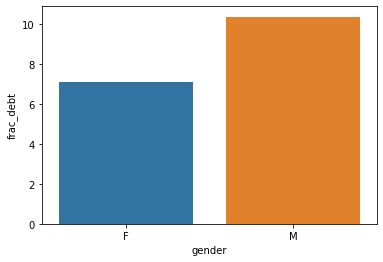

In [55]:
# строим сводную таблицу
data_pivot = df.pivot_table(index='gender', columns='debt', values='purpose', aggfunc='count').reset_index()
# переименуем столбцы в человекопонятные названия
data_pivot=data_pivot.rename(columns={1:'has_debt', 0:'without_debt'})

# считаем долю должников
data_pivot['frac_debt'] = data_pivot['has_debt'] / (data_pivot['has_debt']+data_pivot['without_debt'])*100

# заменим пропуски на нули
data_pivot['has_debt'] = data_pivot['has_debt'].fillna(0)
data_pivot['without_debt'] = data_pivot['without_debt'].fillna(0)

# Удалим строки в которых менее 30 человек в группе. Это статистически незначимая группа
data_pivot['total_group'] = data_pivot['has_debt']+data_pivot['without_debt']
data_pivot = data_pivot[data_pivot['total_group']>30]

# число людей целочисленное
data_pivot['has_debt'] = data_pivot['has_debt'].astype('int')
data_pivot['without_debt'] = data_pivot['without_debt'].astype('int')

display(data_pivot)

# строим гистограмму для наглядности
sns.barplot(x='gender', y='frac_debt', data=data_pivot)

Видим, что гендер сильно влияет на риск невозврата. Мужчины невозвращают чаще 7.13% для женщин против 10,37% для мужчин.<br>
Вероятно дело в психологии. Возможно женщины более ответственны и менее готовы рисковать и связываться с процедурами взыскания долгов банком

##### Вывод 5:
Гендер влияет на его возврат в срок. Женщины более надежные заемщики чем мужчины

##### Вопрос 6:
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Это не входило в исходное задание. Сделал дополнительно
</div>
Как образование заемщика влияет на его возврат в срок?

Строим сводную таблицу и считаем долю должников frac_debt для категорий заемщиков.<br>
Заемщиков разделяем на категории образованию (поле education_id)

,education_id,without_debt,has_debt,total_group,frac_debt,education
0,0,4939,278,5217.0,5.328733,высшее
1,1,13570,1362,14932.0,9.121350,среднее
2,2,676,68,744.0,9.139785,неоконченное высшее
3,3,251,31,282.0,10.992908,начальное


<AxesSubplot:xlabel='education', ylabel='frac_debt'>

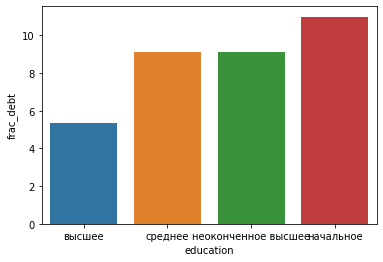

In [56]:
# строим сводную таблицу
data_pivot = df.pivot_table(index='education_id', columns='debt', values='purpose', aggfunc='count').reset_index()
# переименуем столбцы в человекопонятные названия
data_pivot=data_pivot.rename(columns={1:'has_debt', 0:'without_debt'})

# заменим пропуски на нули
data_pivot['has_debt'] = data_pivot['has_debt'].fillna(0)
data_pivot['without_debt'] = data_pivot['without_debt'].fillna(0)

# Удалим строки в которых менее 30 человек в группе. Это статистически незначимая группа
data_pivot['total_group'] = data_pivot['has_debt']+data_pivot['without_debt']
data_pivot = data_pivot[data_pivot['total_group']>30]

# считаем долю должников
data_pivot['frac_debt'] = data_pivot['has_debt'] / (data_pivot['has_debt']+data_pivot['without_debt'])*100

# число людей целочисленное
data_pivot['has_debt'] = data_pivot['has_debt'].astype('int')
data_pivot['without_debt'] = data_pivot['without_debt'].astype('int')

# используем dic_education для вывода понятных категорий образования
data_pivot = data_pivot.merge(dic_education, on='education_id', how='left')
display(data_pivot)

# строим гистограмму для наглядности
sns.barplot(x='education', y='frac_debt', data=data_pivot)

Видим зависимость риска долгов от образования. Чем лучше образование, тем ниже риск долгов. При этом, неоконченное высшее приравнивется к среднему, так как человек не смог осилить ступень высшего и остался на ступени среднего образования.
Причина вероятно в том, что наличие образования помогает не только грамотно планировать финансы, но и отражает интеллектуальные способности, способность выделять важное, не забывать про важное и т.д. Эти навыки полезны для выплаты кредита в срок.

##### Вывод 6:
образование заемщика влияет на его возврат в срок. Кредиты отдаются лучше людьми с высшим образованием (риск 5.33%), чем людьми с начальным образованием (риск 10.99%).

##### Вопрос 7:
<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Это не входило в исходное задание. Сделал дополнительно
</div>
Как тип занятости заемщика влияет на его возврат в срок?

Строим сводную таблицу и считаем долю должников frac_debt для категорий заемщиков.<br>
Заемщиков разделяем по типам занятости (поле income_type)

debt,income_type,without_debt,has_debt,total_group,frac_debt
2,госслужащий,1364,86,1450,5.931034
3,компаньон,4662,376,5038,7.463279
4,пенсионер,3541,216,3757,5.749268
6,сотрудник,9871,1059,10930,9.688930


<AxesSubplot:xlabel='income_type', ylabel='frac_debt'>

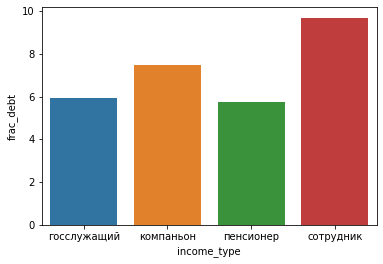

In [90]:
# строим сводную таблицу
# заменим пропуски на нули 
data_pivot = df.pivot_table(index='income_type', columns='debt', values='purpose', aggfunc='count', fill_value=0).reset_index()
# переименуем столбцы в человекопонятные названия
data_pivot=data_pivot.rename(columns={1:'has_debt', 0:'without_debt'})




data_pivot['total_group'] = data_pivot['has_debt']+data_pivot['without_debt']

data_pivot = data_pivot[data_pivot['total_group']>30]

# считаем долю должников
data_pivot['frac_debt'] = data_pivot['has_debt'] / (data_pivot['has_debt']+data_pivot['without_debt'])*100

# число людей целочисленное
data_pivot['has_debt'] = data_pivot['has_debt'].astype('int')
data_pivot['without_debt'] = data_pivot['without_debt'].astype('int')

display(data_pivot)

# строим гистограмму для наглядности
sns.barplot(x='income_type', y='frac_debt', data=data_pivot)

Видим зависимость риска долгов от типа занятости. Госслужащие и пенсионеры демонстрируют лучшую платежную дисциплину и меньший риск образования долгов. Данные категории характерны тем, что получают доход от государства, верятно, данные категории не находясь в конкурентной рыночной среде имеют осторожные консервативные взгляды и не готовы рисковать и связываться с процедурами взысканя долгов банком

##### Вывод 7:
Типа занятости заемщика влияет на его возврат в срок. Кредиты отдаются лучше госслужащими (5.93%) и пенсионерами (5.78%) чем  остальными категориями (7.47% .. 9.71%).

Строим сводную таблицу и считаем долю должников frac_debt для категорий заемщиков.<br>
Заемщиков разделяем по категории возраста (поле dob_years_category)

debt,dob_years_category,without_debt,has_debt,total_group,frac_debt
2,"(18.0, 30.0]",3286,402,3688,10.900217
3,"(30.0, 40.0]",5134,545,5679,9.596760
4,"(40.0, 60.0]",9029,691,9720,7.109053
5,"(60.0, 70.0]",1891,98,1989,4.927099
6,"(70.0, inf]",102,3,105,2.857143


<AxesSubplot:xlabel='dob_years_category', ylabel='frac_debt'>

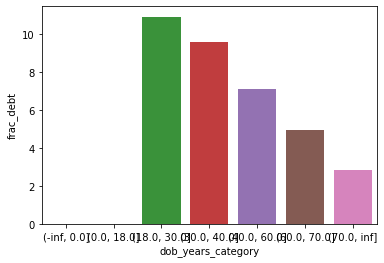

In [61]:
# строим сводную таблицу
data_pivot = df.pivot_table(index='dob_years_category', columns='debt', values='purpose', aggfunc='count').reset_index()
# переименуем столбцы в человекопонятные названия
data_pivot=data_pivot.rename(columns={1:'has_debt', 0:'without_debt'})

# заменим пропуски на нули
data_pivot['has_debt'] = data_pivot['has_debt'].fillna(0)
data_pivot['without_debt'] = data_pivot['without_debt'].fillna(0)

data_pivot['total_group'] = data_pivot['has_debt']+data_pivot['without_debt']

data_pivot = data_pivot[data_pivot['total_group']>30]

# считаем долю должников
data_pivot['frac_debt'] = data_pivot['has_debt'] / (data_pivot['has_debt']+data_pivot['without_debt'])*100

# число людей целочисленное
data_pivot['has_debt'] = data_pivot['has_debt'].astype('int')
data_pivot['without_debt'] = data_pivot['without_debt'].astype('int')

display(data_pivot)

# строим гистограмму для наглядности
sns.barplot(x='dob_years_category', y='frac_debt', data=data_pivot)
data_pivot

Видим зависимость риска долгов от возраста заемщика. Чем старше заемщик, тем лучше платежная дисциплина. Это известный факт, что чем старше люди, тем более они ответственные в целом. Данные подтверждают это.

##### Вывод 8:
Возраст заемщика влияет на его возврат в срок. Чем старше заемщик, тем лучше платежная дисциплина. Риск снижается от 10.92% для категории 19-30 лет до 4.95% для категории 60-70 лет. Категория 71+ лет имеет еще меньший риск, но данных недостатточно для подтверждения такого вывода.

##### Вопрос 9:

Как стаж заемщика влияет на его возврат в срок?

Строим сводную таблицу и считаем долю должников frac_debt для категорий заемщиков.<br>
Заемщиков разделяем по категории стажа (поле years_employed_category)

debt,years_employed_category,without_debt,has_debt,total_group,frac_debt
0,"(-0.9, 2.0]",3136,395,3531,11.186633
1,"(2.0, 3.0]",4088,442,4530,9.757174
2,"(3.0, 4.0]",3837,243,4080,5.955882
3,"(4.0, 5.0]",1813,167,1980,8.434343
4,"(5.0, 9.0]",3229,301,3530,8.526912
5,"(9.0, 50.0]",3339,191,3530,5.410765


<AxesSubplot:xlabel='Стаж работы, лет', ylabel='Доля клиентов с невозвратами в срок, %'>

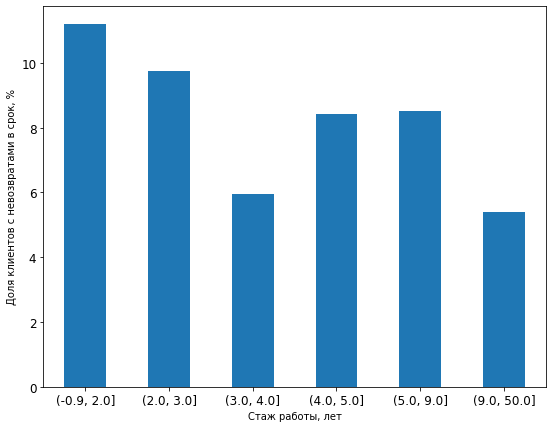

In [86]:
# строим сводную таблицу
data_pivot = df.pivot_table(index='years_employed_category', columns='debt', values='purpose', aggfunc='count').reset_index()
# переименуем столбцы в человекопонятные названия
data_pivot=data_pivot.rename(columns={1:'has_debt', 0:'without_debt'})

# заменим пропуски на нули
data_pivot['has_debt'] = data_pivot['has_debt'].fillna(0)
data_pivot['without_debt'] = data_pivot['without_debt'].fillna(0)

data_pivot['total_group'] = data_pivot['has_debt']+data_pivot['without_debt']

data_pivot = data_pivot[data_pivot['total_group']>30]

# считаем долю должников
data_pivot['frac_debt'] = data_pivot['has_debt'] / (data_pivot['has_debt']+data_pivot['without_debt'])*100

# число людей целочисленное
data_pivot['has_debt'] = data_pivot['has_debt'].astype('int')
data_pivot['without_debt'] = data_pivot['without_debt'].astype('int')

display(data_pivot)
data_pivot.plot(x='years_employed_category', y='frac_debt', kind='bar', figsize=(9,7), 
                xlabel='Стаж работы, лет', ylabel='Доля клиентов с невозвратами в срок, %', legend=False, rot=0, fontsize=12)

# строим гистограмму для наглядности
#sns.barplot(x='years_employed_category', y='frac_debt', data=data_pivot)

Видим зависимость риска долгов от трудового стажа заемщика. Чем выше стаж, тем лучше платежная дисциплина. Эффект проявляется при стаже более 3 лет и отчетливо виден при стаже более 15 лет.
Стаж связан с возрастом. Тут есть прямая корреляция. Возрастные люди более ответственны.

##### Вывод 9:
Трудовой стаж заемщика влияет на его возврат в срок. Стаж более 3 лет снижает риск на 3 п.п., а стаж более 15 лет снижает риск еще на 3 п.п

## Общий вывод:

В данных были обнаружены пропуски в столбцах стажа и дохода. Как показал последующий анализ, данные показатели существенно влияют на риск образования долгов, поэтому стоит исключить возможность пропусков в данных в будущем

Также в данных имеются артефакты 
 - бывает число детей  children < 0 либо число детей 20. Вероятная причина: опечатки при вводе данных
 - бывает возраст клиента в годах  dob_years = 0. Вероятная причина: случайные ошибки.
 - общий трудовой стаж в днях days_employed < 0. Вероятная причина: ошибка в знаке
 - общий трудовой стаж превышает 900 лет. Вероятная причина: техническая ошибка неясного генеза.
 
 


Наличие и количество детей влияет на возврат кредита в срок: от 7.67% при 0 детях до 9.55% при 2 детях. А для числа детей 3+ делать статистические выводы опасно, т.к. выборка небольшая.

Есть зависимость между семейным положением и возвратом кредита в срок. Те, кто еще не вступали в брак (не женат либо только в гражданском браке) имеют более высокий риск задолженности (9,4%..9,84%) против тех, кто уже в браке или был в браке (6,68% .. 7,69%)

Уровень дохода и возврат кредита в срок имеется. Для диапазона зарплат от 50 000 до 1000 000 рост зарплаты влияет на риск невозврата от 7.06% для 50-200 тыс руб до 8.66% для 200-1000 тыс руб

Цели кредита влияют на его возврат в срок. Кредиты на свадьбу несут заметно меньший риск (7.39% .. 8.07%), чем операции с автомобилями и получение образования (9.41% .. 9.33%).


<div class="alert alert-info">
<b>Комментарий студента:</b>
<br>Дополнительные выводы. Это не входило в исходное задание.
<br><br>Гендер влияет на его возврат в срок. Риск невозврата у женщин ниже: 7.13% для женщин против 10,37% для мужчин
<br><br>Образование заемщика влияет на его возврат в срок. Кредиты отдаются лучше людьми с высшим образованием (риск 5.33%), чем людьми с начальным образованием (риск 10.99%).
<br><br>Тип занятости заемщика влияет на его возврат в срок. Кредиты отдаются лучше госслужащими (5.93%) и пенсионерами (5.78%) чем  остальными категориями (7.47% .. 9.71%).
<br><br>Возраст заемщика влияет на его возврат в срок. Чем старше заемщик, тем лучше платежная дисциплина. Риск снижается от 10.92% для категории 19-30 лет до 4.95% для категории 60-70 лет. Категория 71+ лет имеет еще меньший риск, но данных недостаточно для подтверждения такого вывода.
<br>Трудовой стаж заемщика влияет на его возврат в срок. Стаж более 3 лет снижает риск на 3 п.п., а стаж более 15 лет снижает риск еще на 3 п.п
</div>

